<a href="https://colab.research.google.com/github/joomj2000/Computer-Vision/blob/main/study_1/mvs_2_cameracalibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import os
path = '/content/gdrive/MyDrive/MachineVision'
os.mkdir(path)

In [37]:
cd "/content/gdrive/MyDrive/MachineVision"

/content/gdrive/MyDrive/MachineVision


In [25]:
!unzip -qq "/content/gdrive/MyDrive/MachineVision/sample_image.zip"

In [26]:
import numpy as np
import cv2 as cv
import glob
from google.colab.patches import cv_imshow

#종료조건
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

#object points 생성
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

#object points, image points 저장할 array 생성
objpoints = []
imgpoints = []
images = glob.glob('/content/gdrive/MyDrive/MachineVision/sample_image/left*.jpg')

In [27]:
objp

array([[0., 0., 0.],
       [1., 0., 0.],
       [2., 0., 0.],
       [3., 0., 0.],
       [4., 0., 0.],
       [5., 0., 0.],
       [6., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [2., 1., 0.],
       [3., 1., 0.],
       [4., 1., 0.],
       [5., 1., 0.],
       [6., 1., 0.],
       [0., 2., 0.],
       [1., 2., 0.],
       [2., 2., 0.],
       [3., 2., 0.],
       [4., 2., 0.],
       [5., 2., 0.],
       [6., 2., 0.],
       [0., 3., 0.],
       [1., 3., 0.],
       [2., 3., 0.],
       [3., 3., 0.],
       [4., 3., 0.],
       [5., 3., 0.],
       [6., 3., 0.],
       [0., 4., 0.],
       [1., 4., 0.],
       [2., 4., 0.],
       [3., 4., 0.],
       [4., 4., 0.],
       [5., 4., 0.],
       [6., 4., 0.],
       [0., 5., 0.],
       [1., 5., 0.],
       [2., 5., 0.],
       [3., 5., 0.],
       [4., 5., 0.],
       [5., 5., 0.],
       [6., 5., 0.]], dtype=float32)

In [28]:
images

['/content/gdrive/MyDrive/MachineVision/sample_image/left09.jpg',
 '/content/gdrive/MyDrive/MachineVision/sample_image/left08.jpg',
 '/content/gdrive/MyDrive/MachineVision/sample_image/left14.jpg',
 '/content/gdrive/MyDrive/MachineVision/sample_image/left01.jpg',
 '/content/gdrive/MyDrive/MachineVision/sample_image/left03.jpg',
 '/content/gdrive/MyDrive/MachineVision/sample_image/left02.jpg',
 '/content/gdrive/MyDrive/MachineVision/sample_image/left12.jpg',
 '/content/gdrive/MyDrive/MachineVision/sample_image/left06.jpg',
 '/content/gdrive/MyDrive/MachineVision/sample_image/left07.jpg',
 '/content/gdrive/MyDrive/MachineVision/sample_image/left13.jpg',
 '/content/gdrive/MyDrive/MachineVision/sample_image/left05.jpg',
 '/content/gdrive/MyDrive/MachineVision/sample_image/left11.jpg',
 '/content/gdrive/MyDrive/MachineVision/sample_image/left04.jpg']

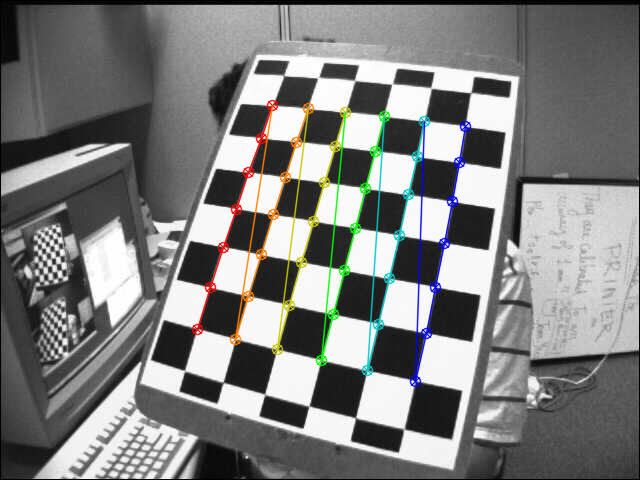

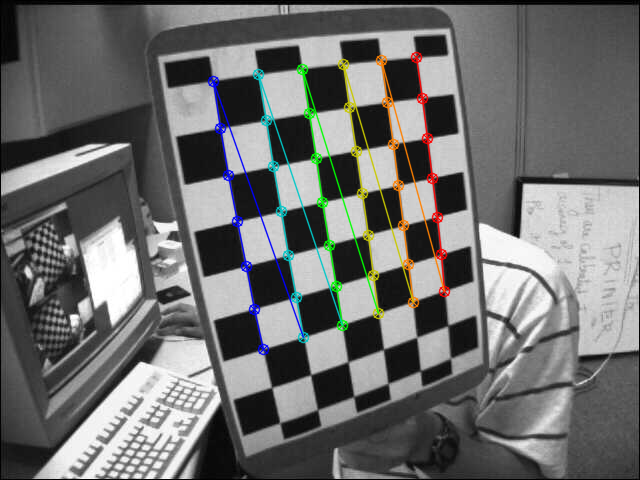

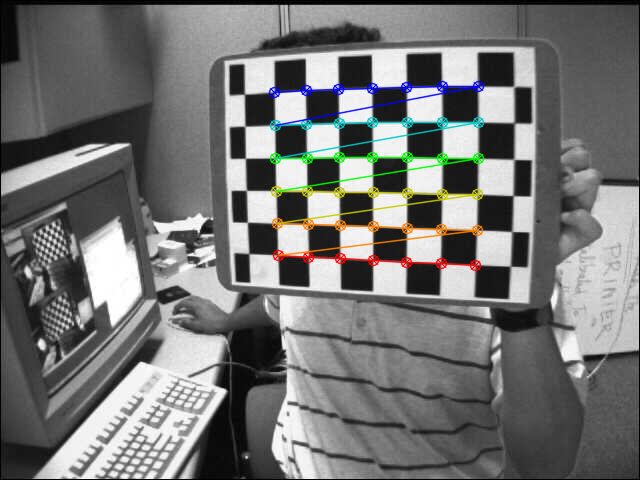

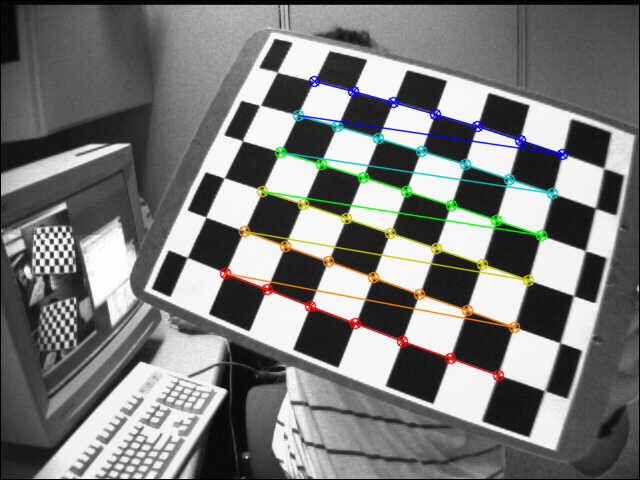

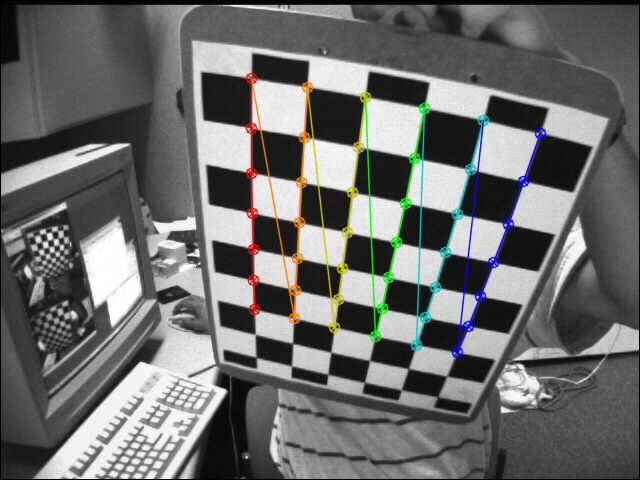

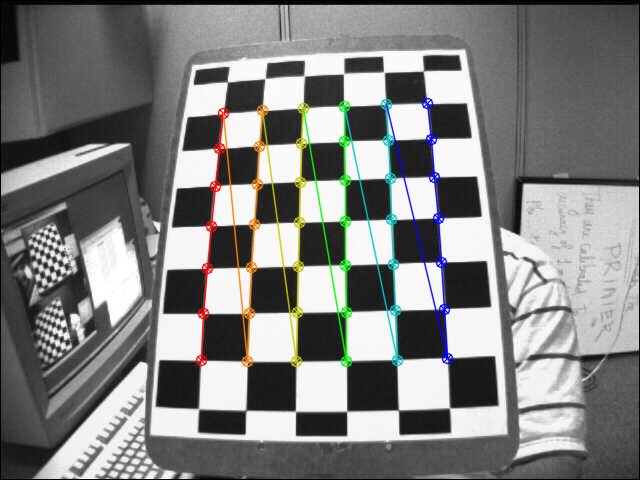

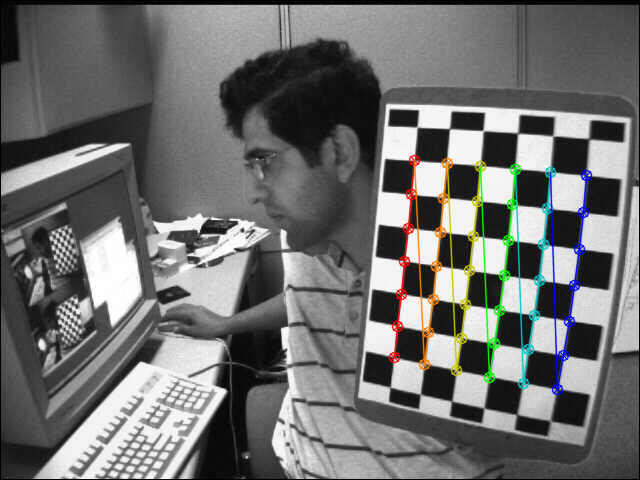

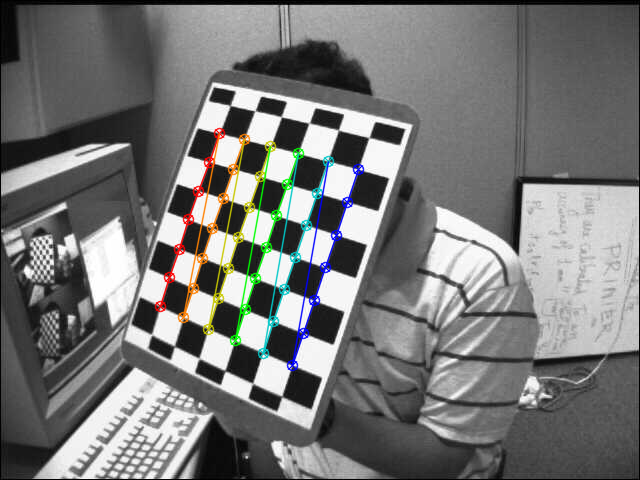

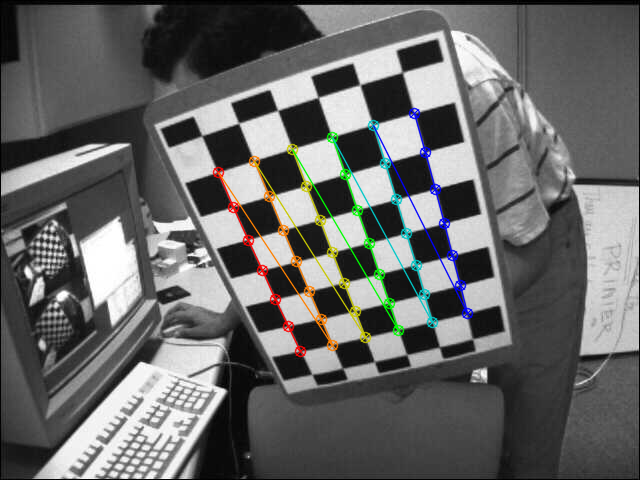

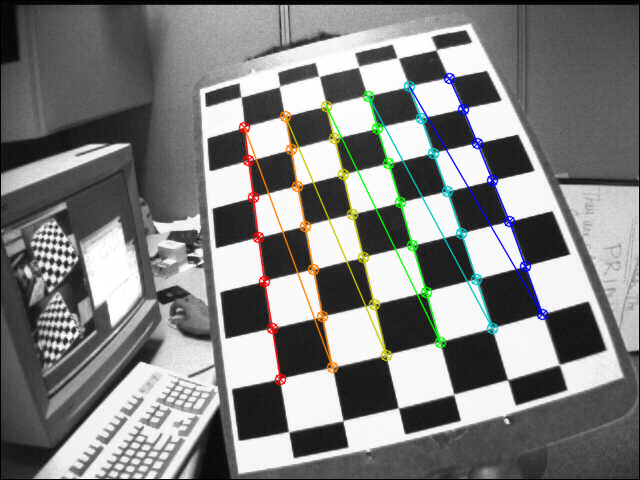

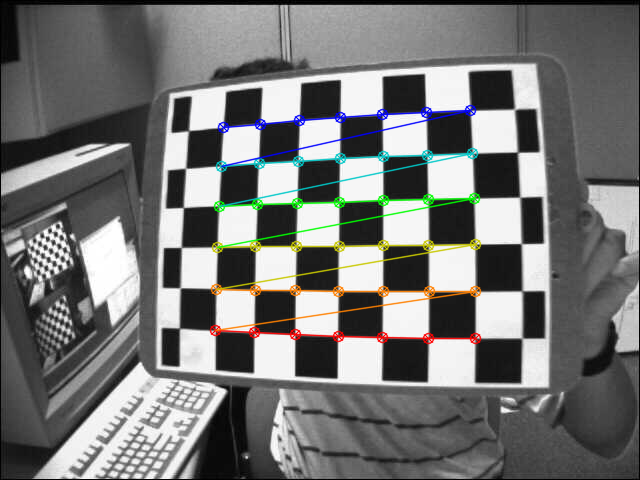

In [29]:
for fname in images :
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    #체스판 코너 찾기
    ret, corners = cv.findChessboardCorners(gray, (7,6), None)
    
    #ret은 corner 검출 여부
    if ret == True :
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
        #corner 그리기
        cv.drawChessboardCorners(img, (7,6), corners2, ret)
        cv_imshow(img)

In [30]:
#calibration
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

#mtx : K 행렬, dist : 왜곡 parameter, rvecs : R 행렬, tvecs : T 행렬

In [31]:
mtx

array([[534.07088625,   0.        , 341.53407095],
       [  0.        , 534.11914801, 232.94565229],
       [  0.        ,   0.        ,   1.        ]])

In [32]:
rvecs

[array([[-0.45883216],
        [-0.08848876],
        [-1.33510786]]), array([[-0.17288944],
        [-0.4676468 ],
        [ 1.34745198]]), array([[-0.43239601],
        [ 0.25603401],
        [-3.08832021]]), array([[-0.26451431],
        [-0.39360849],
        [-2.74787378]]), array([[ 0.41531697],
        [ 0.65664498],
        [-1.3373494 ]]), array([[-0.35367632],
        [-0.24363034],
        [-1.56874295]]), array([[-0.29979222],
        [ 0.39216378],
        [-1.4348239 ]]), array([[-0.32034626],
        [ 0.15979932],
        [-1.24149595]]), array([[ 0.30697387],
        [ 0.50385522],
        [-1.82824733]]), array([[-0.45993979],
        [-0.31420179],
        [-1.76122223]]), array([[-0.37843359],
        [-0.18064237],
        [-3.11615995]])]

In [33]:
tvecs

[array([[-3.27916475],
        [ 2.1581169 ],
        [11.72833353]]), array([[ 1.81888162],
        [-4.26429189],
        [12.45728521]]), array([[ 3.79739159],
        [ 0.89895018],
        [14.85930553]]), array([[3.0368565 ],
        [2.74656588],
        [9.90005142]]), array([[-2.12419173],
        [ 1.8455082 ],
        [12.81229195]]), array([[-2.89985485],
        [ 2.62066994],
        [10.57699267]]), array([[ 1.60364777],
        [ 3.81296376],
        [16.12054481]]), array([[-5.9428668 ],
        [ 2.39629427],
        [16.77859041]]), array([[-1.22339619],
        [ 3.52139947],
        [15.67311794]]), array([[-1.13991514],
        [ 2.67424465],
        [ 9.56289284]]), array([[ 2.82321765],
        [ 2.22374307],
        [10.95762955]])]

In [34]:
def draw(img, corners, imgpts) :
    imgpts = np.int32(imgpts).reshape(-1,2)
    #바닥 초록색
    img = cv.drawContours(img,[imgpts[:4]],-1,(0,255,0),-3)
    #기둥 파란색
    for i,j in zip(range(4),range(4,8)) :
        img = cv.line(img, tuple(imgpts[i]), tuple(imgpts[j]),(255,0,0),3)
    #위의 빨간색
    img = cv.drawContours(img, [imgpts[4:]],-1,(0,0,255),3)
    return img 

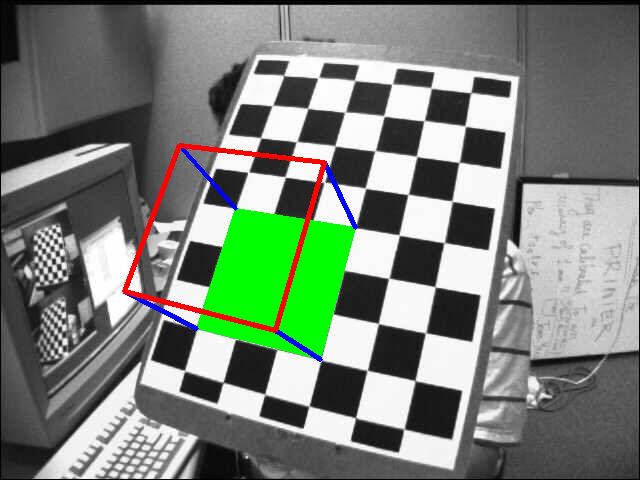

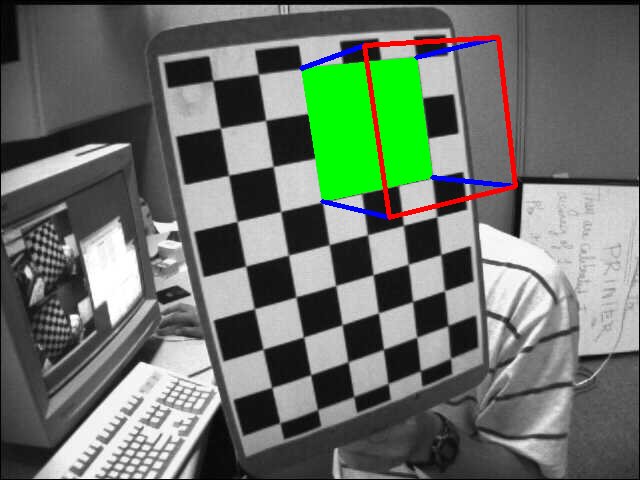

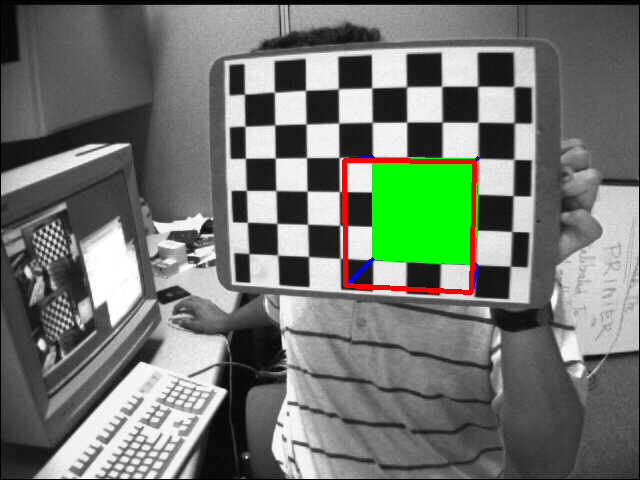

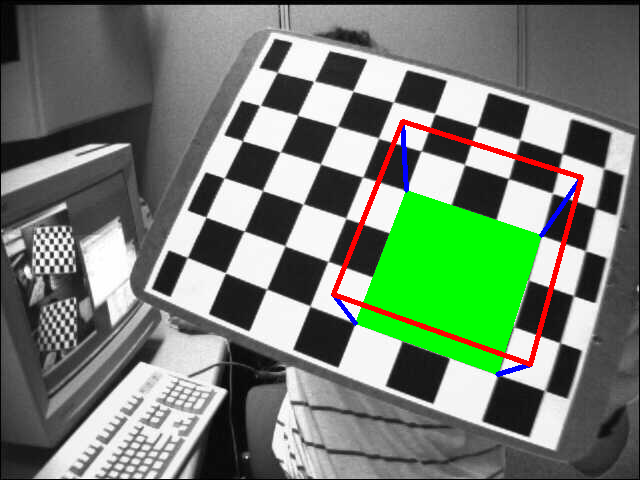

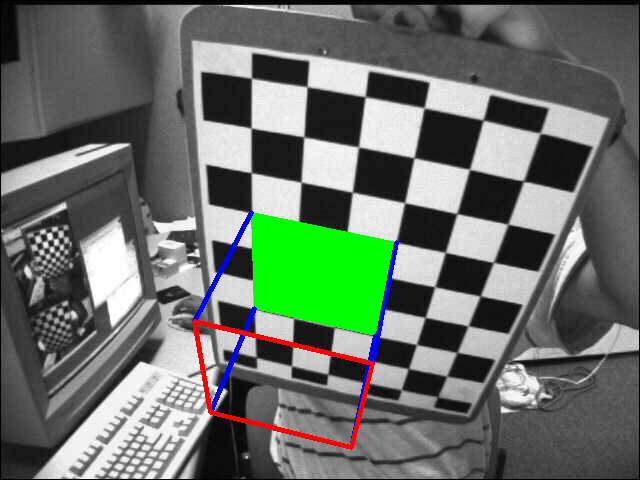

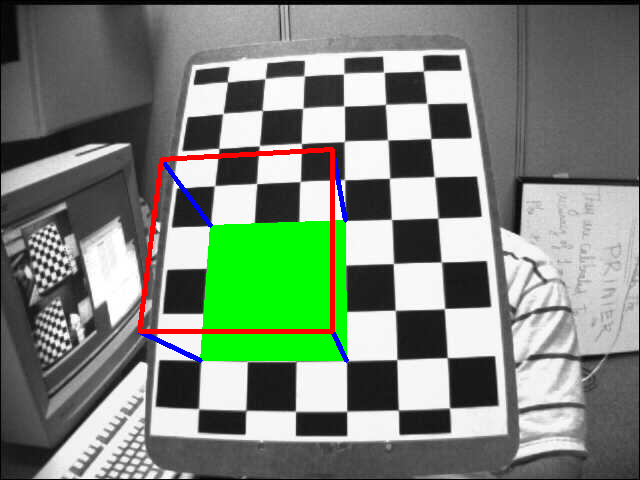

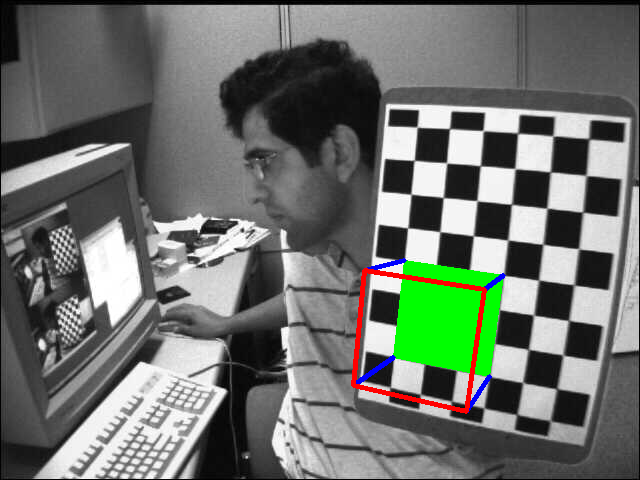

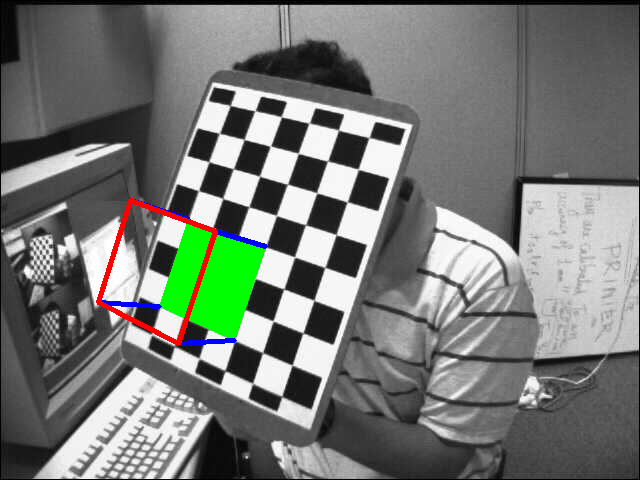

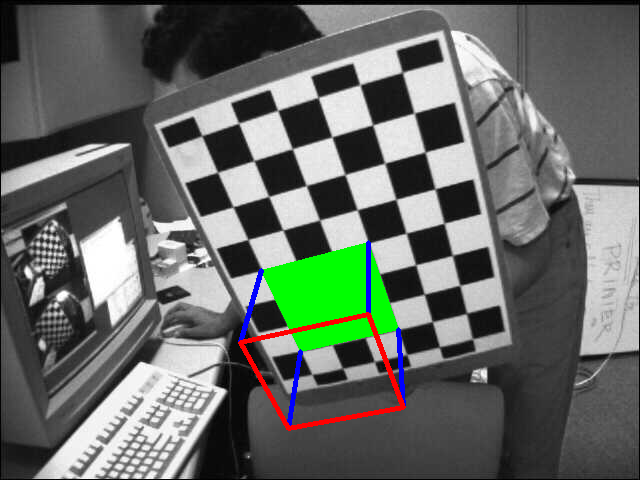

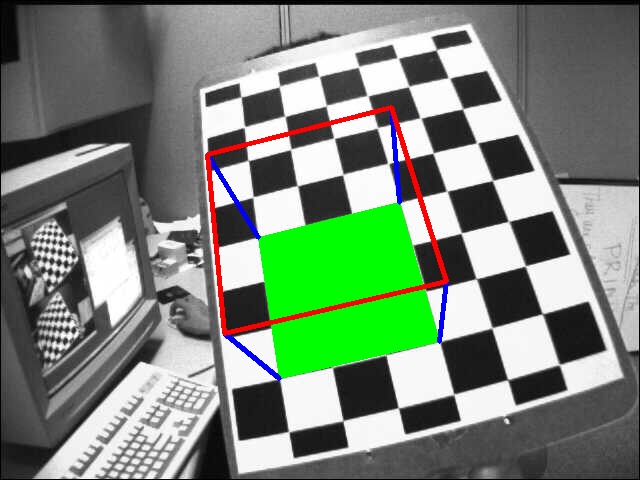

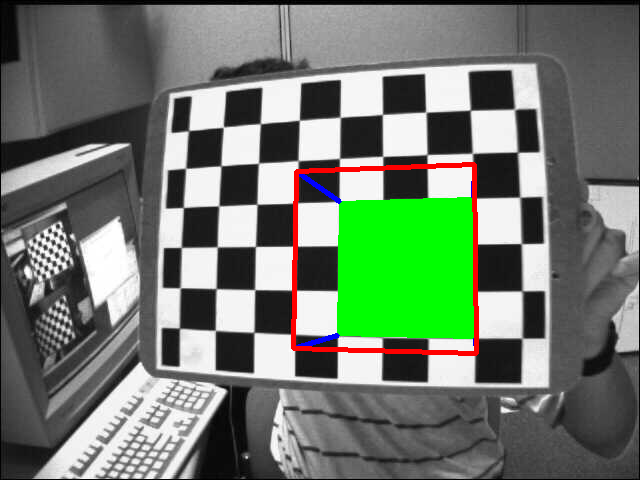

In [36]:
axis = np.float32([[0,0,0],[0,3,0],[3,3,0],[3,0,0],[0,0,-3],[0,3,-3],[3,3,-3],[3,0,-3]])

i = 0
for fname in glob.glob('/content/gdrive/MyDrive/MachineVision/sample_image/left*.jpg') :
    img = cv.imread(fname)
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    ret, corners = cv.findChessboardCorners(gray, (7,6), None)
    if ret == True :
        #3D point를 image plane에 사영
        imgpts, jac = cv.projectPoints(axis, rvecs[i], tvecs[i], mtx, dist)
        i = i + 1
        img = draw(img, corners2, imgpts)
        cv_imshow(img)